#Step 1: Reading and Understanding the Data

In [58]:
# importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [59]:
# TO IGNORE WARNINGS
import warnings
warnings.filterwarnings('ignore')

In [60]:
# READING THE CSV FILE
lead_df=pd.read_csv("/content/Leads.csv")
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [61]:
#INSPECTING THE DATASET
print(lead_df.info())
print(lead_df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [62]:
# TO SEE THE MATHEMATICAL VALUES
lead_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


#Step 2: Data Cleaning

In [63]:
# DISPLAY NULL VALUES PERCENTAGE IN ASCENDING ORDER

print(round(100*(lead_df.isnull().sum()/len(lead_df.index)), 2).sort_values(ascending=False))

Lead Quality                                     51.59
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Tags                                             36.29
Lead Profile                                     29.32
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
I agree to

In [64]:
# CONVERTING ALL THE SELECT TO NULL AND CHECKING NULL AGAIN
cols=lead_df.columns

for cl in cols:
  lead_df[cl]=lead_df[cl].replace('Select',np.nan)
print(round(100*(lead_df.isnull().sum()/len(lead_df.index)), 2).sort_values(ascending=False))

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Index                       45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
I agree to

In [65]:
#GETTING THE COLUMN NAMES WHOSE NULL IS MORE THAN 30%
blank = 100*(lead_df.isna().sum()/len(lead_df)).sort_values(ascending=False)
blank_list=list(blank[blank.values >=35].index)
print(blank_list)

# REMOVE COLUMNS WITH MORE THAN 45% NULL
new_lead1=lead_df.drop(blank_list, axis=1)
new_lead1.shape

['How did you hear about X Education', 'Lead Profile', 'Lead Quality', 'Asymmetrique Profile Score', 'Asymmetrique Activity Score', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'City', 'Specialization', 'Tags']


(9240, 27)

In [66]:
print(round(100*(new_lead1.isnull().sum()/len(new_lead1.index)), 2).sort_values(ascending=False))

What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
X Education Forums                                0.00
A free copy of Mastering The Interview            0.00
I agree to pay the amount through cheque          0.00
Get updates on DM Content                         0.00
Update me on Supply Chain Content                 0.00
Receive More Updates About Our Courses            0.00
Through Recommendations                           0.00
Digital Advertisement                             0.00
Newspaper                                         0.00
Prospect ID                                       0.00
Newspaper Article                                 0.00
Magazine  

In [67]:
# CHECK THE COUNTRIES

new_lead1.Country.value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [68]:
# CHECKING NUMBER OF INDIANS

country_percentage = round(100*len(new_lead1[new_lead1['Country'] == 'India'])/len(new_lead1['Country']),2)
print(country_percentage)

70.26


 Since "India" occurs around 70% of times in the Country column, and country column also has around 27% as missing values, 
we shall go ahead and drop the column

In [69]:
# REMOVING THE COUNTRY COLUMN
new_lead1 = new_lead1.drop(['Country'], axis=1)

In [70]:
# LEAD SOURCE VALUES

new_lead1['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

 From the above it can be noticed that Google appears twice with different cases. Hence we shall convert all rows with value 
 "Google" to the same case.
Also since "Google" has the major chunk of data, we can impute the null values with Google

In [71]:
# GOOGLE DIFFERENT SPELLINGS MERGED IN ONE AND THEN DISPLAY THE VALUES

new_lead1['Lead Source'] = new_lead1['Lead Source'].replace('google', 'Google')
new_lead1['Lead Source'] = new_lead1['Lead Source'].replace(np.nan, 'Google')
new_lead1['Lead Source'].value_counts()

Google               2909
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
Pay per Click Ads       1
blog                    1
WeLearn                 1
welearnblog_Home        1
youtubechannel          1
testone                 1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [72]:
# TOTAL VISITS VALUE

new_lead1['TotalVisits'].value_counts()

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: TotalVisits, dtype: int64

In [73]:
# REPLACING NULL WITH MEDIAN

new_lead1['TotalVisits'] = new_lead1['TotalVisits'].replace(np.nan, new_lead1['TotalVisits'].median())

In [74]:
# PAGE VIEWS PER VISIT VALUES

new_lead1['Page Views Per Visit'].value_counts()

0.00    2189
2.00    1795
3.00    1196
4.00     896
1.00     651
        ... 
3.43       1
2.56       1
6.33       1
1.64       1
2.08       1
Name: Page Views Per Visit, Length: 114, dtype: int64

In [75]:
# REPLACING VALUES OF PAGE PER VISIT BY MEDIAN 

new_lead1['Page Views Per Visit'] = new_lead1['Page Views Per Visit'].replace(np.nan, new_lead1['Page Views Per Visit'].median())

In [76]:
# AS THE VALUES WERE NOT GIVEN IN THIS CATEGORICAL VARIABLE SO WE CAN REPLACE IT WITH 'Unknown'

new_lead1['Last Activity'] = new_lead1['Last Activity'].replace(np.nan, 'Unknown')

In [77]:
# "What is your current Occupation" VALUES

new_lead1['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [78]:
# AS NO INORMATION WAS PROVIDED NULL VALUES ARE REPLACED BY 'No Information'

new_lead1['What is your current occupation'] = new_lead1['What is your current occupation'].replace(np.nan, 'No Information')

In [79]:
#  'What matters most to you in choosing a course ' VALUES

new_lead1['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [80]:
# CHECKING THE PERCENTAGE
per = round(100*len(new_lead1[new_lead1['What matters most to you in choosing a course']== 'Better Career Prospects'])/len(new_lead1['What matters most to you in choosing a course']),2)
print(per)

70.65


Since Better Career Prospects occurs around 70% of times in the What matters most to you in choosing a course column, and
since the column also has around 29% as missing values, we shall go ahead and drop the column

In [81]:
# REMOVING 'What matters most to you in choosing a course' VALUES
new_lead1 = new_lead1.drop(['What matters most to you in choosing a course'], axis=1)

In [82]:
# CHECKING FOR THE NULL 
print(round(100*(new_lead1.isnull().sum()/len(new_lead1.index)), 2).sort_values(ascending=False))

Prospect ID                                 0.0
Magazine                                    0.0
A free copy of Mastering The Interview      0.0
I agree to pay the amount through cheque    0.0
Get updates on DM Content                   0.0
Update me on Supply Chain Content           0.0
Receive More Updates About Our Courses      0.0
Through Recommendations                     0.0
Digital Advertisement                       0.0
Newspaper                                   0.0
X Education Forums                          0.0
Newspaper Article                           0.0
Search                                      0.0
Lead Number                                 0.0
What is your current occupation             0.0
Last Activity                               0.0
Page Views Per Visit                        0.0
Total Time Spent on Website                 0.0
TotalVisits                                 0.0
Converted                                   0.0
Do Not Call                             

In [83]:
# CHECKING SOME COLUMNS 
print(new_lead1['Receive More Updates About Our Courses'].value_counts())
print(new_lead1['Update me on Supply Chain Content'].value_counts())
print(new_lead1['Get updates on DM Content'].value_counts())
print(new_lead1['I agree to pay the amount through cheque'].value_counts())  
print(new_lead1['Magazine'].value_counts())


No    9240
Name: Receive More Updates About Our Courses, dtype: int64
No    9240
Name: Update me on Supply Chain Content, dtype: int64
No    9240
Name: Get updates on DM Content, dtype: int64
No    9240
Name: I agree to pay the amount through cheque, dtype: int64
No    9240
Name: Magazine, dtype: int64


They have 1 value, so these columns can be deleted.

In [84]:
# REMOVING COLUMN THAT HAS ONLY VALUE
blank=['Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque','Magazine','Prospect ID','Lead Number']
new_lead1=new_lead1.drop(blank, axis=1)
print(new_lead1.shape)

(9240, 18)


##### CHECKING AND HANDLING OUTLIERS

In [85]:
# OUTLIERS - 25%,50%,75%,90%,95% and above
new_lead1.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.385390,3.438636,487.698268,2.357440
std,0.486714,4.819024,548.021466,2.145781
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,12.000000,1.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
90%,1.000000,7.000000,1380.000000,5.000000
95%,1.000000,10.000000,1562.000000,6.000000
99%,1.000000,17.000000,1840.610000,9.000000


From the above, it can be seen that outlier exists in the columns TotalVisits and Page Views Per Visit columns.

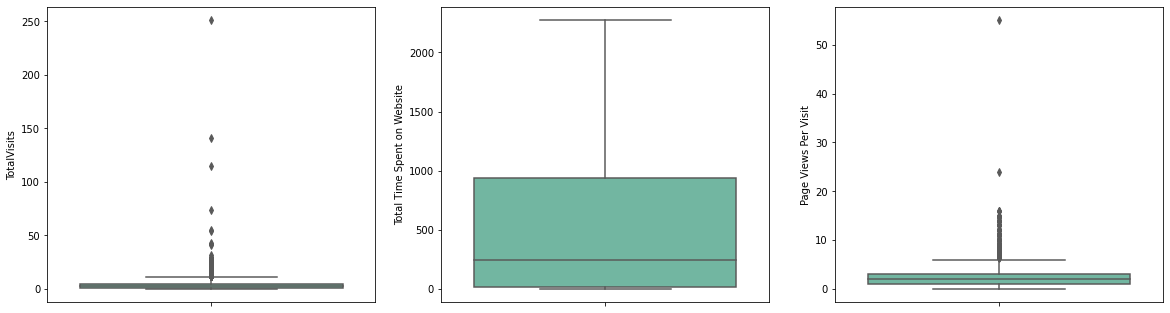

In [86]:
# OUTLIERS IN NUMERIC COLUMN

plt.figure(figsize=(20, 25))
plt.subplot(4,3,1)
sns.boxplot(y = 'TotalVisits', palette='Set2', data = new_lead1)
plt.subplot(4,3,2)
sns.boxplot(y = 'Total Time Spent on Website', palette='Set2', data = new_lead1)
plt.subplot(4,3,3)
sns.boxplot(y = 'Page Views Per Visit', palette='Set2', data = new_lead1)
plt.show()

In [87]:
# REMOVING VALUES MORE THAN .99

nn_quartile_total_visits = new_lead1['TotalVisits'].quantile(0.99)
new_lead1 = new_lead1[new_lead1["TotalVisits"] < nn_quartile_total_visits]
new_lead1["TotalVisits"].describe(percentiles=[.25,.5,.75,.90,.95,.99])

count    9141.000000
mean        3.179740
std         2.913631
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%         9.000000
99%        13.000000
max        16.000000
Name: TotalVisits, dtype: float64

In [88]:
# OUTLIERS - 25%,50%,75%,90%,95% and above

new_lead1.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9141.000000,9141.000000,9141.000000,9141.000000
mean,0.385406,3.179740,486.074609,2.329506
std,0.486718,2.913631,547.856302,2.046673
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,10.000000,1.000000
50%,0.000000,3.000000,247.000000,2.000000
75%,1.000000,5.000000,933.000000,3.000000
90%,1.000000,7.000000,1379.000000,5.000000
95%,1.000000,9.000000,1561.000000,6.000000
99%,1.000000,13.000000,1839.600000,9.000000


In [89]:
# 'Page Views Per Visit' VALUES MORE THAN .99 REMOVED

nn_quartile_page_visits = new_lead1['Page Views Per Visit'].quantile(0.99)
new_lead1 = new_lead1[new_lead1["Page Views Per Visit"] < nn_quartile_page_visits]
new_lead1["Page Views Per Visit"].describe(percentiles=[.25,.5,.75,.90,.95,.99])

count    9029.000000
mean        2.226383
std         1.823395
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
90%         5.000000
95%         6.000000
99%         7.000000
max         8.000000
Name: Page Views Per Visit, dtype: float64

In [90]:
# OUTLIER - 25%,50%,75%,90%,95% and above
new_lead1.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9029.000000,9029.000000,9029.000000,9029.000000
mean,0.385092,3.087164,483.133016,2.226383
std,0.486644,2.801244,547.420675,1.823395
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,7.000000,1.000000
50%,0.000000,3.000000,245.000000,2.000000
75%,1.000000,4.000000,929.000000,3.000000
90%,1.000000,7.000000,1378.000000,5.000000
95%,1.000000,8.000000,1558.000000,6.000000
99%,1.000000,13.000000,1839.720000,7.000000


At this point, the data has been cleaned and around 98% of data has been retained

### Step 3: Data Analysis
Let us try and understand the data now based on each columns effect on the conversion rates

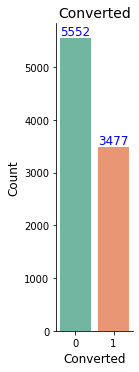

In [91]:
# CONVERTED COLUMN

plot = sns.catplot(x="Converted", kind="count", data=new_lead1, palette="Set2", aspect= 0.4);

plt.title('Converted', fontsize = 14)
plt.xlabel("Converted", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

# COUNT

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='blue', ha='center', va='bottom')
    
plt.show()

From the above graph, there has been a overall conversion rate of around 39%

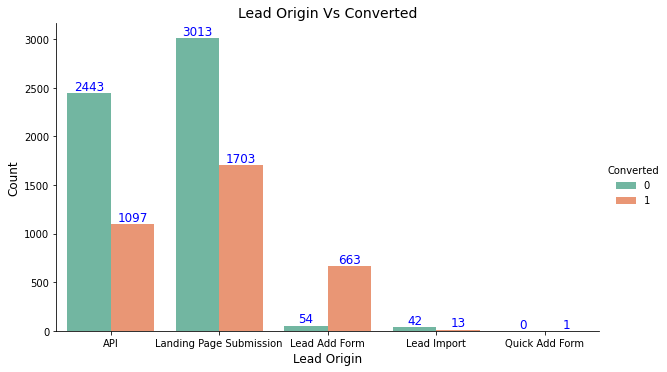

In [92]:
# LEAD ORIGIN VS CONVERTED

plot = sns.catplot(x="Lead Origin", hue = "Converted", kind="count", data=new_lead1, palette="Set2", aspect= 1.7);

plt.title('Lead Origin Vs Converted', fontsize = 14)
plt.xlabel("Lead Origin", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='blue', ha='center', va='bottom')
    
plt.show()

From the above graph, it can be seen that the maximum conversion happened from Landing Page Submission
Also there was only one request from quick add form which got converted.

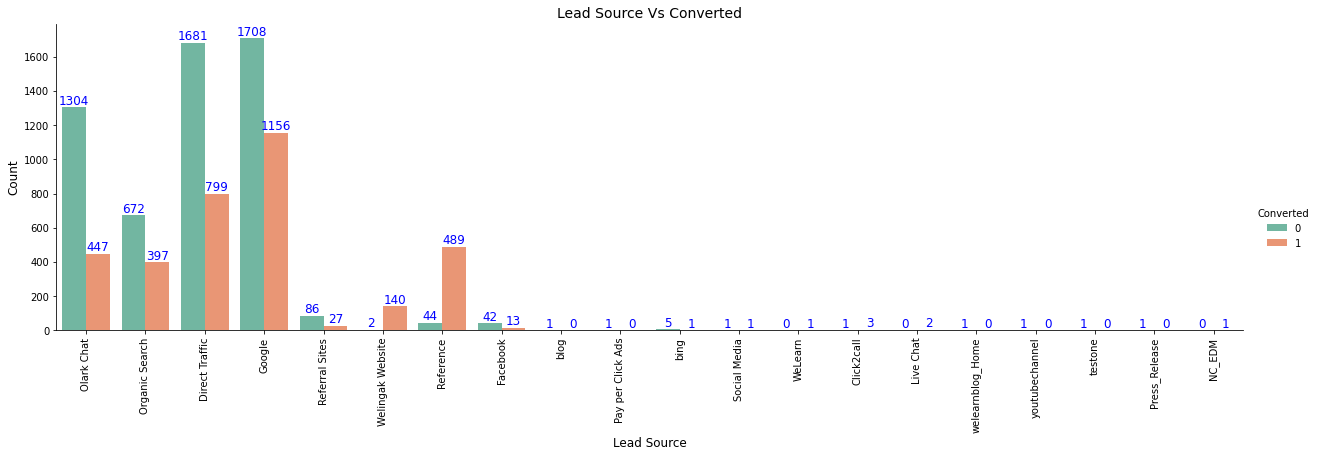

In [93]:
# Lead Source VS Converted

plot = sns.catplot(x="Lead Source", hue = "Converted", kind="count", data=new_lead1, palette="Set2", aspect = 3.5);

plt.title('Lead Source Vs Converted', fontsize = 14)
plt.xlabel("Lead Source", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.xticks(rotation=90)

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='blue', ha='center', va='bottom')
   
plt.show()

From the above graph, it can be seen that major conversion in the lead source is from google

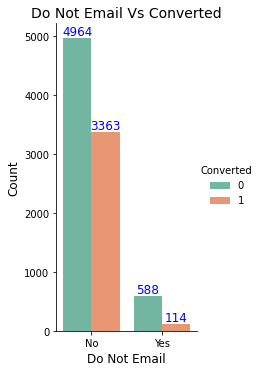

In [94]:
# Do not Email VS Converted

plot = sns.catplot(x="Do Not Email", hue = "Converted", kind="count", data=new_lead1, palette="Set2", aspect = 0.6);

plt.title('Do Not Email Vs Converted', fontsize = 14)
plt.xlabel("Do Not Email", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

Based on the above graph, major conversion has happend from the emails that have been sent

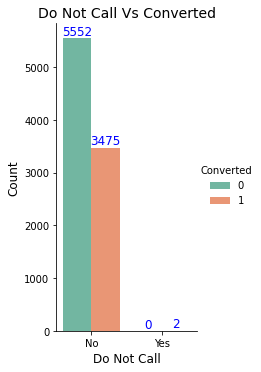

In [95]:
# Do not Call VS Converted

plot = sns.catplot(x="Do Not Call", hue = "Converted", kind="count", data=new_lead1, palette="Set2", aspect = 0.6);

plt.title('Do Not Call Vs Converted', fontsize = 14)
plt.xlabel("Do Not Call", fontsize = 12)
plt.ylabel("Count", fontsize = 12)


ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

From the above graph , it can be noticed that major conversions happened when calls were made.
However, it can also be seen that 2 leads opted for "Do Not Call", but they still got converted.

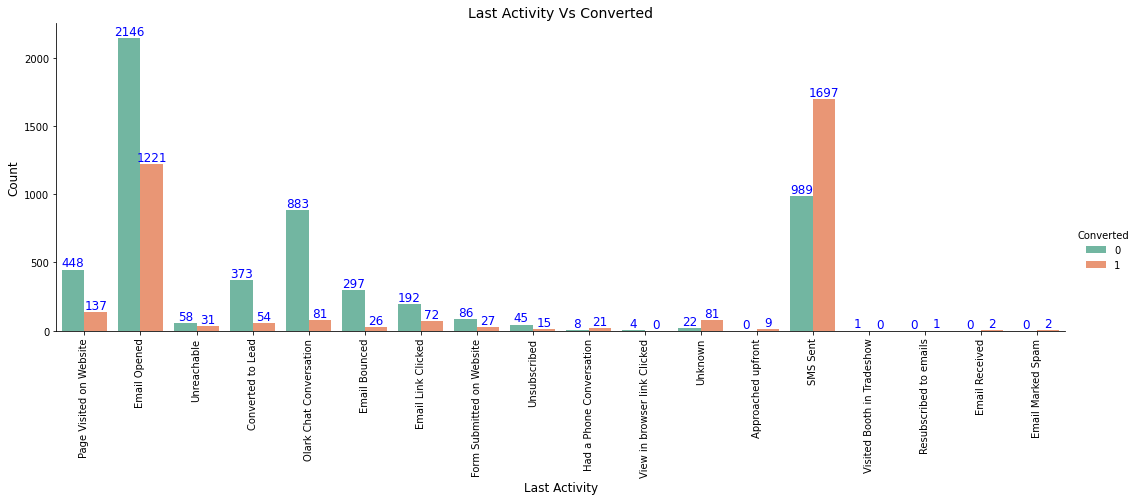

In [96]:
# Last Activity VS Converted

plot = sns.catplot(x="Last Activity", hue = "Converted", kind="count", data=new_lead1, palette="Set2", aspect = 3.0);

plt.title('Last Activity Vs Converted', fontsize = 14)
plt.xlabel("Last Activity", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.xticks(rotation=90)
ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

As per the above graph, last activity value of 'SMS Sent' had more conversion

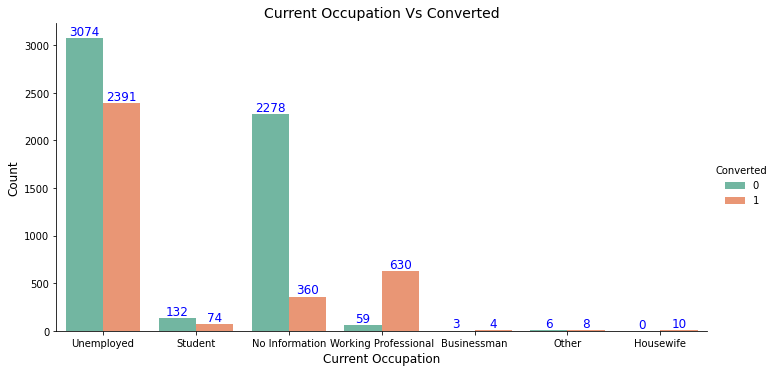

In [97]:
# What is your current occupation VS Converted

plot = sns.catplot(x="What is your current occupation", hue = "Converted", kind="count", data=new_lead1, palette="Set2", 
                   aspect = 2.0);

plt.title('Current Occupation Vs Converted', fontsize = 14)
plt.xlabel("Current Occupation", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

More conversion happend with people who are unemployed. It can also be noticed from the above data that 
    - Out of 7 business men, 4 got converted
    - Out 10 housewives, all 10 leads got converted.

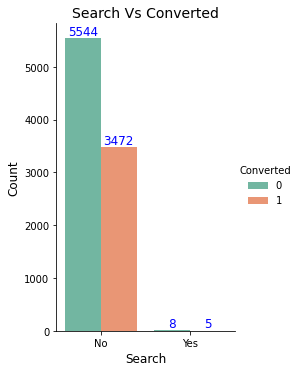

In [98]:
# Search VS Converted

plot = sns.catplot(x="Search", hue = "Converted", kind="count", data=new_lead1, palette="Set2", aspect = 0.7);

plt.title('Search Vs Converted', fontsize = 14)
plt.xlabel("Search", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

Conversion rate is high on leads who are not through search

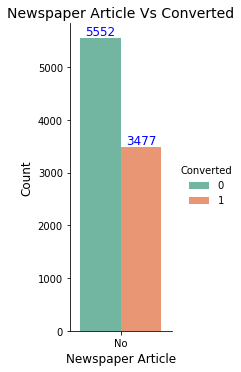

In [99]:
# Newspaper Article VS Converted

plot = sns.catplot(x="Newspaper Article", hue = "Converted", kind="count", data=new_lead1, palette="Set2", aspect = 0.5);

plt.title('Newspaper Article Vs Converted', fontsize = 14)
plt.xlabel("Newspaper Article", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

Since "Newspaper Article" column now has only one value for all rows - "No" , it is safe to drop this column

In [100]:
# Dropping Newspaper Article

new_lead1 = new_lead1.drop(['Newspaper Article'], axis=1)

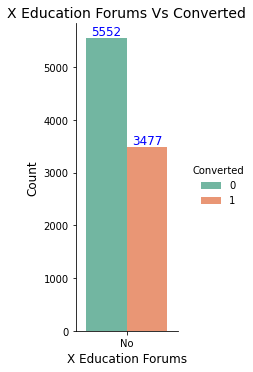

In [101]:
# X Education Forums VS Converted

plot = sns.catplot(x="X Education Forums", hue = "Converted", kind="count", data=new_lead1, palette="Set2", aspect = 0.5);

plt.title('X Education Forums Vs Converted', fontsize = 14)
plt.xlabel("X Education Forums", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

Since "X Education Forums" column now has only one value for all rows - "No" , it is safe to drop this column

In [102]:
# Dropping X Education Forum column

new_lead1 = new_lead1.drop(['X Education Forums'], axis=1)

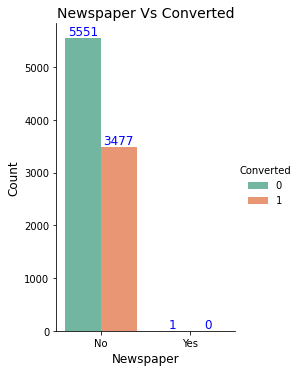

In [103]:
# Newspaper VS Converted
plot = sns.catplot(x="Newspaper", hue = "Converted", kind="count", data=new_lead1, palette="Set2", aspect = 0.7);

plt.title('Newspaper Vs Converted', fontsize = 14)
plt.xlabel("Newspaper", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

Since Newspaper column has only one row with "Yes" as the value and further since this lead did not get converted and rest of all the values are "No", we can safely drop the column

In [104]:
# Dropping Newspaper column

new_lead1 = new_lead1.drop(['Newspaper'], axis=1)

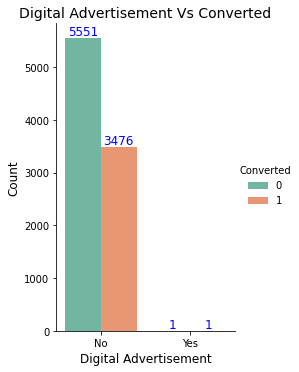

In [105]:
# Digital Advertisement VS Converted

plot = sns.catplot(x="Digital Advertisement", hue = "Converted", kind="count", data=new_lead1, palette="Set2", aspect = 0.7);

plt.title('Digital Advertisement Vs Converted', fontsize = 14)
plt.xlabel("Digital Advertisement", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

It can be noticed above that there were 2 leads that came from digital advertisement of which one lead got converted

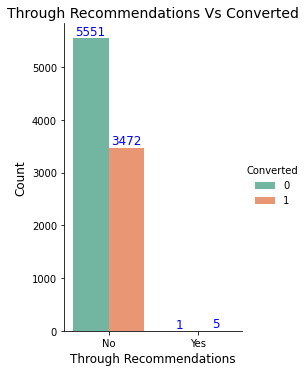

In [106]:
# Through Recommendations VS Converted

plot = sns.catplot(x="Through Recommendations", hue = "Converted", kind="count", data=new_lead1, palette="Set2", aspect = 0.7);

plt.title('Through Recommendations Vs Converted', fontsize = 14)
plt.xlabel("Through Recommendations", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

It can be seen that a total of 6 leads came through recommendations of which 5 leads got converted

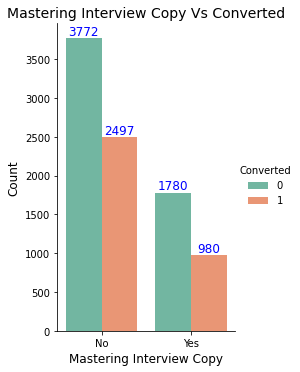

In [107]:
# A free copy of Mastering The Interview

plot = sns.catplot(x="A free copy of Mastering The Interview", hue = "Converted", kind="count", data=new_lead1, palette="Set2",
                   aspect = 0.7);

plt.title('Mastering Interview Copy Vs Converted', fontsize = 14)
plt.xlabel("Mastering Interview Copy", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

Conversion rate is high on leads who do not want a free copy of Mastering Interviews

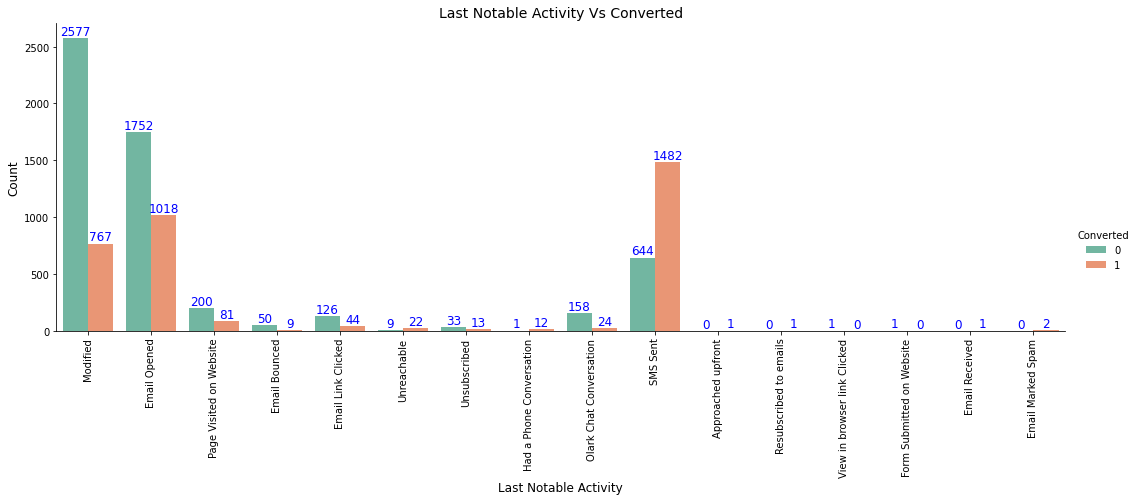

In [108]:
# Last Notable Activity VS Converted

plot = sns.catplot(x="Last Notable Activity", hue = "Converted", kind="count", data=new_lead1, palette="Set2", aspect = 3.0);

plt.title('Last Notable Activity Vs Converted', fontsize = 14)
plt.xlabel("Last Notable Activity", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.xticks(rotation=90)

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

It can be noticed that the conversion rate is high for "SMS Sent"

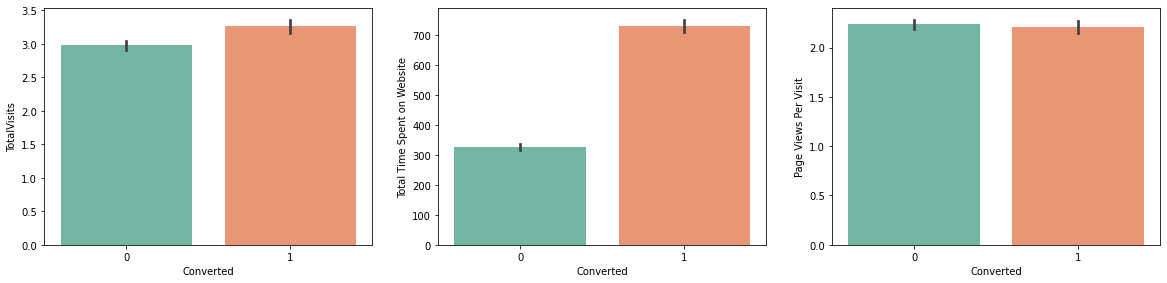

In [109]:
# COMPARING NUMERICAL VARIABLE VALUES

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'TotalVisits', x='Converted', palette='Set2', data = new_lead1)
plt.subplot(4,3,2)
sns.barplot(y = 'Total Time Spent on Website', x='Converted', palette='Set2', data = new_lead1)
plt.subplot(4,3,3)
sns.barplot(y = 'Page Views Per Visit', x='Converted', palette='Set2', data = new_lead1)
plt.show()

The conversion rated were high for Total Visits, Total Time Spent on Website and Page Views Per Visit

## Step 4: Data Preparation - Creating Dummies

Converting some binary variables (Yes/No) to 0/1

In [110]:
variablelist =  variablelist =  ['Do Not Email', 'Do Not Call', 'Search', 'Digital Advertisement', 'Through Recommendations', 
                                 'A free copy of Mastering The Interview']

# FUNCTION TO CONVERT YES AND NO TO 0 AND 1
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the columns
new_lead1[variablelist] = new_lead1[variablelist].apply(binary_map)

In [111]:
# print(new_lead1['Lead Source'].value_counts())
# d_lead_source

In [112]:
# DUMMY CREATION-------
# Lead Origin : 

d_lead_origin = pd.get_dummies(new_lead1['Lead Origin'], prefix='LeadOrigin')
d_lead_origin1 = d_lead_origin.drop(['LeadOrigin_Quick Add Form'], 1)
#Adding the results to the master dataframe
new_lead1 = pd.concat([new_lead1, d_lead_origin1], axis = 1)

# Lead Source :

d_lead_source = pd.get_dummies(new_lead1['Lead Source'], prefix='LeadSource')
d_lead_source1 = d_lead_source.drop(['LeadSource_youtubechannel'], 1)
# Adding the results to the master dataframe
new_lead1 = pd.concat([new_lead1,d_lead_source1], axis=1)

# last Activity

d_last_activity = pd.get_dummies(new_lead1['Last Activity'], prefix='LastActivity')
d_last_activity1 = d_last_activity.drop(['LastActivity_Resubscribed to emails'], 1)
# Adding the results to the master dataframe
new_lead1 = pd.concat([new_lead1,d_last_activity1], axis=1)

# What is your current occupation

d_curr_occupation = pd.get_dummies(new_lead1['What is your current occupation'], prefix='CurrentOccupation')
d_curr_occupation1 = d_curr_occupation.drop(['CurrentOccupation_Businessman'], 1)
# Adding the results to the master dataframe
new_lead1 = pd.concat([new_lead1,d_curr_occupation1], axis=1)

# Last Notable Activity

d_last_notable_activity = pd.get_dummies(new_lead1['Last Notable Activity'], prefix='LastNotableActivity')
d_last_notable_activity1 = d_last_notable_activity.drop(['LastNotableActivity_Resubscribed to emails'], 1)
# Adding the results to the master dataframe
new_lead1 = pd.concat([new_lead1,d_last_notable_activity1], axis=1)

new_lead1.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,...,LastNotableActivity_Email Received,LastNotableActivity_Form Submitted on Website,LastNotableActivity_Had a Phone Conversation,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Page Visited on Website,LastNotableActivity_SMS Sent,LastNotableActivity_Unreachable,LastNotableActivity_Unsubscribed,LastNotableActivity_View in browser link Clicked
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Unemployed,...,0,0,0,1,0,0,0,0,0,0
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Unemployed,...,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Student,...,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Unemployed,...,0,0,0,1,0,0,0,0,0,0
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Unemployed,...,0,0,0,1,0,0,0,0,0,0


In [113]:
# Remove following columns from the new_lead1  -  Lead Origin,Lead Source,Last Activity,What is your current occupatio,Last Notable Activity

new_lead1 = new_lead1.drop([ 'Lead Origin', 'Lead Source', 'Last Activity',
                          'What is your current occupation', 'Last Notable Activity'], axis=1)


In [114]:
new_lead1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9029 entries, 0 to 9239
Data columns (total 71 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Do Not Email                                      9029 non-null   int64  
 1   Do Not Call                                       9029 non-null   int64  
 2   Converted                                         9029 non-null   int64  
 3   TotalVisits                                       9029 non-null   float64
 4   Total Time Spent on Website                       9029 non-null   int64  
 5   Page Views Per Visit                              9029 non-null   float64
 6   Search                                            9029 non-null   int64  
 7   Digital Advertisement                             9029 non-null   int64  
 8   Through Recommendations                           9029 non-null   int64  
 9   A free copy of Mast

In [115]:
# NULL PERCENTAGE
print(round(100*(new_lead1.isnull().sum()/len(new_lead1.index)), 2).sort_values(ascending=False))

Do Not Email                                        0.0
LastActivity_Unknown                                0.0
CurrentOccupation_No Information                    0.0
CurrentOccupation_Housewife                         0.0
LastActivity_Visited Booth in Tradeshow             0.0
                                                   ... 
LeadSource_Press_Release                            0.0
LeadSource_Pay per Click Ads                        0.0
LeadSource_Organic Search                           0.0
LeadSource_Olark Chat                               0.0
LastNotableActivity_View in browser link Clicked    0.0
Length: 71, dtype: float64


In [116]:
# DATASET SHAPE
new_lead1.shape

(9029, 71)

Since there are around 71 columns, we will not be looking at the correlation using heat map as we will not be able to infer anything from the heat map due to huge data

### Step 5: Test-Train Split

In [117]:
# X VARIABLE

X = new_lead1.drop(['Converted'], axis=1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,LeadOrigin_API,...,LastNotableActivity_Email Received,LastNotableActivity_Form Submitted on Website,LastNotableActivity_Had a Phone Conversation,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Page Visited on Website,LastNotableActivity_SMS Sent,LastNotableActivity_Unreachable,LastNotableActivity_Unsubscribed,LastNotableActivity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [118]:
# y VARIABLE
y = new_lead1['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [119]:
# SPLITTING DATA TO TRAIN AND TEST

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=42)

### Step 6: Rescaling the features with MinMax Scaling

In [120]:
scaler = MinMaxScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits',
                                                                        'Total Time Spent on Website','Page Views Per Visit']])
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,LeadOrigin_API,...,LastNotableActivity_Email Received,LastNotableActivity_Form Submitted on Website,LastNotableActivity_Had a Phone Conversation,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Page Visited on Website,LastNotableActivity_SMS Sent,LastNotableActivity_Unreachable,LastNotableActivity_Unsubscribed,LastNotableActivity_View in browser link Clicked
2240,0,0,0.1875,0.898963,0.375,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
113,0,0,0.3125,0.706360,0.625,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4132,0,0,0.3750,0.768155,0.750,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
5573,0,0,0.1250,0.028868,0.250,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1109,0,0,0.0625,0.009021,0.125,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [121]:
# CONVERSION RATE PERCENTAGE

converted = (sum(new_lead1['Converted'])/len(new_lead1['Converted'].index))*100
converted

38.50924797873519

#### We have almost 39% conversion rate

### Step 7: Model Building


Running the Initial Training Model

Assessing the model with StatsModels

In [122]:
# Logistic regression model WITH ALL THE COLUMNS
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
print(logm1.fit().summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6259
Model Family:                Binomial   Df Model:                           60
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 28 Feb 2023   Deviance:                   1.5013e+05
Time:                        06:34:58   Pearson chi2:                 7.34e+18
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
                                                       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------

### Step 8: Feature Selection Using RFE

In [123]:
logreg = LogisticRegression()

# running RFE with 20 variables as output

rfe = RFE(logreg,n_features_to_select= 20)            
rfe = rfe.fit(X_train, y_train)

In [124]:
rfe.support_

array([ True, False,  True,  True,  True,  True, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False,  True, False, False, False,  True, False, False, False,
        True, False, False, False, False,  True, False, False, False,
       False,  True, False, False,  True,  True, False,  True, False,
       False, False, False, False,  True,  True, False, False, False,
        True, False, False, False, False, False, False, False,  True,
        True, False, False, False,  True, False, False])

In [125]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 13),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Search', True, 1),
 ('Digital Advertisement', False, 45),
 ('Through Recommendations', False, 30),
 ('A free copy of Mastering The Interview', False, 37),
 ('LeadOrigin_API', False, 9),
 ('LeadOrigin_Landing Page Submission', False, 8),
 ('LeadOrigin_Lead Add Form', True, 1),
 ('LeadOrigin_Lead Import', False, 20),
 ('LeadSource_Click2call', False, 29),
 ('LeadSource_Direct Traffic', False, 16),
 ('LeadSource_Facebook', False, 10),
 ('LeadSource_Google', False, 27),
 ('LeadSource_Live Chat', False, 38),
 ('LeadSource_NC_EDM', False, 46),
 ('LeadSource_Olark Chat', True, 1),
 ('LeadSource_Organic Search', False, 26),
 ('LeadSource_Pay per Click Ads', False, 47),
 ('LeadSource_Press_Release', False, 48),
 ('LeadSource_Reference', True, 1),
 ('LeadSource_Referral Sites', False, 25),
 ('LeadSource_Social Media', False, 41),
 (

In [126]:
# VARIABLE CHOOSEN BY RFE

col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Search', 'LeadOrigin_Lead Add Form',
       'LeadSource_Olark Chat', 'LeadSource_Reference',
       'LeadSource_Welingak Website', 'LastActivity_Approached upfront',
       'LastActivity_Email Opened', 'LastActivity_Had a Phone Conversation',
       'LastActivity_Olark Chat Conversation', 'LastActivity_SMS Sent',
       'CurrentOccupation_Housewife', 'CurrentOccupation_No Information',
       'CurrentOccupation_Working Professional',
       'LastNotableActivity_Had a Phone Conversation',
       'LastNotableActivity_Modified', 'LastNotableActivity_Unreachable'],
      dtype='object')

#### Rebuilding Model - Model 2

In [127]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6299
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2501.1
Date:                Tue, 28 Feb 2023   Deviance:                       5002.3
Time:                        06:35:06   Pearson chi2:                 6.53e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

Removing column LastActivity_Approached_Upfront as it has a high pvalue and hence is insignificant

In [128]:
col = col.drop('LastActivity_Approached upfront',1)

#### Rebuilding Model - Model 3

In [129]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6300
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2506.6
Date:                Tue, 28 Feb 2023   Deviance:                       5013.2
Time:                        06:35:06   Pearson chi2:                 6.53e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

Removing column CurrentOccupation_Housewife as it has a high pvalue and hence is insignificant

In [130]:
col = col.drop('CurrentOccupation_Housewife',1)

#### Rebuilding Model - Model 4

In [131]:
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6301
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2513.3
Date:                Tue, 28 Feb 2023   Deviance:                       5026.7
Time:                        06:35:06   Pearson chi2:                 6.54e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

Removing column LastActivity_Had a Phone Conversation as it has high pvalue and hence is insignificant

In [132]:
col = col.drop('LastActivity_Had a Phone Conversation',1)

#### Rebuilding Model - Model 5

In [133]:
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6302
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2514.1
Date:                Tue, 28 Feb 2023   Deviance:                       5028.2
Time:                        06:35:06   Pearson chi2:                 6.30e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

Removing column LeadSource_Reference as it has high pvalue and hence is insignificant 

In [134]:
col = col.drop('LeadSource_Reference',1)

#### Rebuilding Model - Model 6

In [135]:
X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6303
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2514.8
Date:                Tue, 28 Feb 2023   Deviance:                       5029.6
Time:                        06:35:07   Pearson chi2:                 6.28e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

Removing column Search as it has high pvalue and hence insignificant

> Indented block



In [136]:
col = col.drop('Search',1)

#### Rebuilding Model - Model 7

In [137]:
X_train_sm = sm.add_constant(X_train[col])
logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6304
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2516.2
Date:                Tue, 28 Feb 2023   Deviance:                       5032.5
Time:                        06:35:07   Pearson chi2:                 6.28e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

Since the Model 7 seems to be stable with significant pvalues, we shall go ahead with this model for further analysis

In [138]:
# predicted value on train set

y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

2240    0.692600
113     0.539248
4132    0.718698
5573    0.133628
1109    0.014225
2282    0.031692
2976    0.854208
8431    0.399257
2770    0.745493
5790    0.995570
dtype: float64

In [139]:
# Reshape

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.69260021, 0.53924773, 0.71869827, 0.13362844, 0.01422486,
       0.03169166, 0.85420845, 0.39925732, 0.74549262, 0.99556994])

##### PREDICTED DATAFRAME

In [140]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['LeadId'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId
0,0,0.692600,2240
1,0,0.539248,113
2,1,0.718698,4132
3,0,0.133628,5573
4,0,0.014225,1109


##### Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [141]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId,predicted
0,0,0.692600,2240,1
1,0,0.539248,113,1
2,1,0.718698,4132,1
3,0,0.133628,5573,0
4,0,0.014225,1109,0


In [142]:
# Confusion matrix 

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3412  446]
 [ 712 1750]]


In [143]:
# Overall accuracy.

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8167721518987342


Accuracy rate is around 81% which is good. However we will also need to calculate the other metrics as we cannot depend only 
on the accuracy metrics

##### Checking VIFs

In [144]:
# Feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                                        Features   VIF
3                           Page Views Per Visit  6.11
1                                    TotalVisits  4.70
7                      LastActivity_Email Opened  2.37
2                    Total Time Spent on Website  2.14
9                          LastActivity_SMS Sent  2.12
5                          LeadSource_Olark Chat  2.10
13                  LastNotableActivity_Modified  1.78
8           LastActivity_Olark Chat Conversation  1.76
4                       LeadOrigin_Lead Add Form  1.62
10              CurrentOccupation_No Information  1.57
6                    LeadSource_Welingak Website  1.30
11        CurrentOccupation_Working Professional  1.18
0                                   Do Not Email  1.14
14               LastNotableActivity_Unreachable  1.02
12  LastNotableActivity_Had a Phone Conversation  1.01


All variables have a good value of VIF. So we need not drop any more variables and we can proceed with making predictions using this model only

##### Metrics - Sensitivity, Specificity, False Positive Rate, Postitive Predictive Value and Negative Predictive Value

In [145]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [146]:
# Sensitivity of our logistic regression model

TP / float(TP+FN)

0.710804224207961

In [147]:
# Calculate specificity

TN / float(TN+FP)

0.8843960601347849

In [148]:
# Calculate false postive rate - predicting non conversion when leads have converted

print(FP/ float(TN+FP))

0.11560393986521514


In [149]:
# Positive predictive value 

print (TP / float(TP+FP))

0.7969034608378871


In [150]:
# Negative predictive value

print (TN / float(TN+ FN))

0.8273520853540253


### Step 9: Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [151]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [152]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, 
                                         drop_intermediate = False )

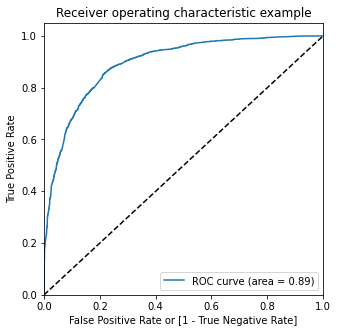

In [153]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

### Step 10: Finding Optimal Cutoff Point

Optimal cut off probability is that prob where we get balanced sensitivity and specificity

In [154]:
# Different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.692600,2240,1,1,1,1,1,1,1,1,0,0,0
1,0,0.539248,113,1,1,1,1,1,1,1,0,0,0,0
2,1,0.718698,4132,1,1,1,1,1,1,1,1,1,0,0
3,0,0.133628,5573,0,1,1,0,0,0,0,0,0,0,0
4,0,0.014225,1109,0,1,0,0,0,0,0,0,0,0,0


In [155]:
# Calculate accuracy sensitivity and specificity for various probability cutoffs.

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.389557  1.000000  0.000000
0.1   0.1  0.659335  0.972380  0.459565
0.2   0.2  0.760601  0.922421  0.657335
0.3   0.3  0.802532  0.879366  0.753499
0.4   0.4  0.816614  0.782291  0.838517
0.5   0.5  0.816772  0.710804  0.884396
0.6   0.6  0.811234  0.642973  0.918611
0.7   0.7  0.785127  0.531682  0.946864
0.8   0.8  0.762816  0.443948  0.966304
0.9   0.9  0.720570  0.302193  0.987558


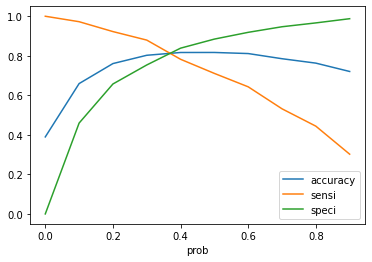

In [156]:
# Accuracy sensitivity and specificity for various probabilities.

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

##### From the curve above, 0.37 is the optimum point to take it as a cutoff probability.

In [157]:
# Final prediction using 0.37 as the cut off

y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.37 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.692600,2240,1,1,1,1,1,1,1,1,0,0,0,1
1,0,0.539248,113,1,1,1,1,1,1,1,0,0,0,0,1
2,1,0.718698,4132,1,1,1,1,1,1,1,1,1,0,0,1
3,0,0.133628,5573,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.014225,1109,0,1,0,0,0,0,0,0,0,0,0,0


In [158]:
# Calculate the lead score

y_train_pred_final['lead_score'] = y_train_pred_final.Converted_Prob.map(lambda x: round(x*100))
y_train_pred_final.head(20)

,Converted,Converted_Prob,LeadId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,lead_score
0,0,0.692600,2240,1,1,1,1,1,1,1,1,0,0,0,1,69
1,0,0.539248,113,1,1,1,1,1,1,1,0,0,0,0,1,54
2,1,0.718698,4132,1,1,1,1,1,1,1,1,1,0,0,1,72
3,0,0.133628,5573,0,1,1,0,0,0,0,0,0,0,0,0,13
4,0,0.014225,1109,0,1,0,0,0,0,0,0,0,0,0,0,1
5,0,0.031692,2282,0,1,0,0,0,0,0,0,0,0,0,0,3
6,1,0.854208,2976,1,1,1,1,1,1,1,1,1,1,0,1,85
7,0,0.399257,8431,0,1,1,1,1,0,0,0,0,0,0,1,40
8,1,0.745493,2770,1,1,1,1,1,1,1,1,1,0,0,1,75
9,1,0.995570,5790,1,1,1,1,1,1,1,1,1,1,1,1,100


In [159]:
# checking if 80% cases are correctly predicted based on the converted column.

# Total of final predicted conversion / non conversion counts from the actual converted rates

checking_df = y_train_pred_final.loc[y_train_pred_final['Converted']==1,['Converted','final_predicted']]
checking_df['final_predicted'].value_counts()

1    1971
0     491
Name: final_predicted, dtype: int64

In [160]:
# Percentage of final_predicted conversions

1965/float(1965+497)

0.7981316003249391

##### Hence we can see that the final prediction of conversions have a target of 80% conversion as per the X Educations CEO's requirement . Hence this is a good model.

In [161]:
# Overall accuracy.

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8128164556962025

In [162]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3166,  692],
       [ 491, 1971]])

In [163]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [164]:
# Sensitivity of our logistic regression model

TP / float(TP+FN)

0.8005686433793664

In [165]:
# Calculate specificity

TN / float(TN+FP)

0.8206324520476931

In [166]:
# Calculate false postive rate - predicting conversions when leads has not converted

print(FP/ float(TN+FP))

0.1793675479523069


In [167]:
# Positive predictive value 

print (TP / float(TP+FP))

0.740142696207285


In [168]:
# Negative predictive value

print (TN / float(TN+ FN))

0.86573694284933


##### Metrics - Precision and Recall

In [169]:
# Confusion matrix 

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3412,  446],
       [ 712, 1750]])

In [170]:
# Precision

precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7969034608378871

In [171]:
# Recall

recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.710804224207961

### Precision and recall tradeoff

In [172]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       1
 3       0
 4       0
        ..
 6315    1
 6316    1
 6317    0
 6318    0
 6319    0
 Name: Converted, Length: 6320, dtype: int64, 0       1
 1       1
 2       1
 3       0
 4       0
        ..
 6315    0
 6316    1
 6317    0
 6318    0
 6319    0
 Name: predicted, Length: 6320, dtype: int64)

In [173]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

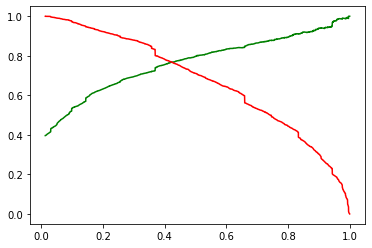

In [174]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Step 11: Making predictions on the test set

In [175]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits',
                                                                        'Total Time Spent on Website','Page Views Per Visit']])

In [176]:
X_test = X_test[col]
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,LeadOrigin_Lead Add Form,LeadSource_Olark Chat,LeadSource_Welingak Website,LastActivity_Email Opened,LastActivity_Olark Chat Conversation,LastActivity_SMS Sent,CurrentOccupation_No Information,CurrentOccupation_Working Professional,LastNotableActivity_Had a Phone Conversation,LastNotableActivity_Modified,LastNotableActivity_Unreachable
2296,0,0.1875,0.665313,0.37500,0,0,0,0,0,1,0,0,0,0,0
8697,0,0.4375,0.184032,0.21875,0,0,0,0,0,1,0,0,0,0,0
7378,0,0.1250,0.163284,0.25000,0,0,0,1,0,0,0,0,0,0,0
8631,0,0.3125,0.407307,0.62500,0,0,0,0,0,1,0,0,0,1,0
4799,0,0.5000,0.744700,1.00000,0,0,0,0,0,1,0,0,0,0,0


In [177]:
X_test_sm = sm.add_constant(X_test)

Making predictions on the test set

In [178]:
y_test_pred = res.predict(X_test_sm)

In [179]:
y_test_pred[:10]

2296    0.900062
8697    0.644749
7378    0.220473
8631    0.623345
4799    0.928426
4503    0.357389
7129    0.863910
1717    0.144108
8398    0.864212
5116    0.255433
dtype: float64

In [180]:
# y-pred DATAFRAME

y_pred_1 = pd.DataFrame(y_test_pred)

In [181]:

y_pred_1.head()

,0
2296,0.900062
8697,0.644749
7378,0.220473
8631,0.623345
4799,0.928426


In [182]:
# y-test DATAFRAME

y_test_df = pd.DataFrame(y_test)

In [183]:
# LeadId to index

y_test_df['LeadId'] = y_test_df.index

In [184]:
# Removing index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [185]:
# Appending y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [186]:
y_pred_final.head()

,Converted,LeadId,0
0,1,2296,0.900062
1,0,8697,0.644749
2,0,7378,0.220473
3,0,8631,0.623345
4,1,4799,0.928426


In [187]:
# Renaming and # Rearranging the columns

y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})
y_pred_final.loc[:,['LeadId','Converted','Converted_Prob']]

,LeadId,Converted,Converted_Prob
0,2296,1,0.900062
1,8697,0,0.644749
2,7378,0,0.220473
3,8631,0,0.623345
4,4799,1,0.928426
...,...,...,...
2704,8688,0,0.069971
2705,7783,0,0.179964
2706,6255,1,0.658813
2707,5390,1,0.942814


In [188]:
# Based on cut off threshold using accuracy, sensitivity and specificity of 0.37%

y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.37 else 0)

In [189]:
y_pred_final.head()

,Converted,LeadId,Converted_Prob,final_predicted
0,1,2296,0.900062,1
1,0,8697,0.644749,1
2,0,7378,0.220473,0
3,0,8631,0.623345,1
4,1,4799,0.928426,1


In [190]:
# Calculate the lead score

y_pred_final['lead_score'] = y_pred_final.Converted_Prob.map(lambda x: round(x*100))
y_pred_final.head(20)

,Converted,LeadId,Converted_Prob,final_predicted,lead_score
0,1,2296,0.900062,1,90
1,0,8697,0.644749,1,64
2,0,7378,0.220473,0,22
3,0,8631,0.623345,1,62
4,1,4799,0.928426,1,93
5,0,4503,0.357389,0,36
6,0,7129,0.863910,1,86
7,0,1717,0.144108,0,14
8,0,8398,0.864212,1,86
9,1,5116,0.255433,0,26


In [191]:
#  80% cases are correctly predicted based on the converted column.

# Total of final predicted conversion or non conversion counts from the actual converted rates

checking_test_df = y_pred_final.loc[y_pred_final['Converted']==1,['Converted','final_predicted']]
checking_test_df['final_predicted'].value_counts()

1    812
0    203
Name: final_predicted, dtype: int64

In [192]:
# Percentage of final_predicted conversions on test data

797/float(797+218)

0.7852216748768472

##### Hence we can see that the final prediction of conversions have a target rate of 79% (78.5%) (Around 1 % short of the predictions made on training data set)

##### Overall Metrics - Accuracy, Confusion Metrics, Sensitivity, Specificity  on test set

In [193]:
# Accuracy.

metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.813953488372093

In [194]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1393,  301],
       [ 203,  812]])

In [195]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [196]:
# Sensitivity of our logistic regression model
TP / float(TP+FN)

0.8

In [197]:
# Calculate specificity
TN / float(TN+FP)

0.8223140495867769

##### Precision and Recall metrics for the test set 

In [198]:
# precision
print('precision ',precision_score(y_pred_final.Converted, y_pred_final.final_predicted))

# recall
print('recall ',recall_score(y_pred_final.Converted, y_pred_final.final_predicted))

precision  0.7295597484276729
recall  0.8


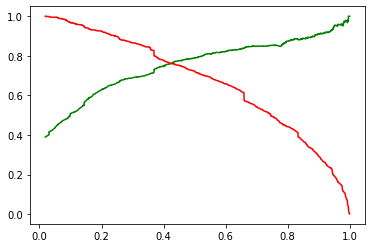

In [199]:

p, r, thresholds = precision_recall_curve(y_pred_final.Converted, y_pred_final.Converted_Prob)

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

Conclusion :
    
    - While we have checked both Sensitivity-Specificity as well as Precision and Recall Metrics, we have considered the
      optimal 
      cut off based on Sensitivity and Specificity for calculating the final prediction.
    - Accuracy, Sensitivity and Specificity values of test set are around 81%, 79% and 82% which are approximately closer to 
      the respective values calculated using trained set.
    - Also the lead score calculated in the trained set of data shows the conversion rate on the final predicted model is 
      around 80%
    - Hence overall this model seems to be good.   